## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?


ANSWER:
TF stands for term frequency and it measures how often a term appears in a document. It is calculated by taking the count of the term in the document divided by the total amount of terms. IDF stands for Inverse Document Frequency and it measure how much information the term provides by measuring how common the term is across multiple documents. 
TF-IDF combindes these two methods to measure how important a term is for a given document in a collection of documents. It adjust for the fact that some words are just generally more common than others. It is helpful to highlight terms which are frequent in one document but rare in the collection. 


> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).


In [34]:
import json
from collections import defaultdict
import networkx as nx
import community as community_louvain 
from collections import defaultdict
import pandas as pd
import numpy as np
import ast

#### Load datasets and create dataframe with community and degrees

In [39]:
# Load the JSON file
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to NetworkX graph
G = nx.json_graph.node_link_graph(graph_data, edges="links", directed = False)

with open("louvain_partition.json", "r") as f:
    loaded_partition = json.load(f)

In [40]:
# Get degrees
degrees = dict(G.degree())

# Create DataFrame
df = pd.DataFrame({
    "Author": list(loaded_partition.keys()),
    "Community": list(loaded_partition.values()),
    "Degree": [degrees[node] for node in loaded_partition.keys()]
    })
df

Author  Community  Degree
0      https://openalex.org/A5067008528          0       6
1      https://openalex.org/A5022754313          0      25
2      https://openalex.org/A5044056170          0       4
3      https://openalex.org/A5012701585          0      17
4      https://openalex.org/A5071496598          0      15
...                                 ...        ...     ...
14755  https://openalex.org/A5100431699         87       4
14756  https://openalex.org/A5101877341         87       4
14757  https://openalex.org/A5108625853          1       1
14758  https://openalex.org/A5047601648         29       1
14759  https://openalex.org/A5087900468         16       2

[14760 rows x 3 columns]

#### Check the number of communities

In [41]:
#Unique values present in the 'Community' column:
unique_communities = df['Community'].unique()

print(np.sort(unique_communities))
len(unique_communities)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167]


168

#### Load final paper dataset and abstract dataset with tokens

In [8]:
papers = pd.read_csv("final_papers.csv")
papers

id  publication_year  cited_by_count  \
0      https://openalex.org/W3129422154              2021             189   
1      https://openalex.org/W4392375089              2024              12   
2      https://openalex.org/W3087570498              2020             124   
3      https://openalex.org/W2905008240              2018              90   
4      https://openalex.org/W3129992849              2021              56   
...                                 ...               ...             ...   
35540  https://openalex.org/W1529149406              2001              40   
35541   https://openalex.org/W175605978              1994              21   
35542  https://openalex.org/W2036131512              2008             120   
35543  https://openalex.org/W2009589362              2009              86   
35544  https://openalex.org/W2004122274              2012              51   

                                              author_ids  
0      ['https://openalex.org/A5067008528', 'https://...  
1      ['https://openalex.org/A5022754313', 'https://...  
2      ['https://openalex.org/A5069473136', 'https://...  
3      ['https://openalex.org/A5034327826', 'https://...  
4      ['https://openalex.org/A5022754313', 'https://...  
...                                                  ...  
35540  ['https://openalex.org/A5078136609', 'https://...  
35541  ['https://openalex.org/A5078136609', 'https://...  
35542  ['https://openalex.org/A5083811020', 'https://...  
35543  ['https://openalex.org/A5083674230', 'https://...  
35544  ['https://openalex.org/A5083674230', 'https://...  

[35545 rows x 4 columns]

In [59]:
abstracts = pd.read_csv("abstracts_with_collocations.csv")
abstracts

id  \
0      https://openalex.org/W3129422154   
1      https://openalex.org/W4392375089   
2      https://openalex.org/W3087570498   
3      https://openalex.org/W2905008240   
4      https://openalex.org/W3129992849   
...                                 ...   
35535  https://openalex.org/W1529149406   
35536   https://openalex.org/W175605978   
35537  https://openalex.org/W2036131512   
35538  https://openalex.org/W2009589362   
35539  https://openalex.org/W2004122274   

                                                   title  \
0      Expectations of reward and efficacy guide cogn...   
1      An experimental manipulation of the value of e...   
2      The impact of COVID-19 on the gender division ...   
3      The strength of long-range ties in population-...   
4      Promises and Perils of Experimentation: The Mu...   
...                                                  ...   
35535  Three Companions for Data Mining in First Orde...   
35536         Applications of a logical discovery engine   
35537  The bandwagon effect of collaborative filterin...   
35538                                 Authority vs. peer   
35539  Electronic Friend or Virtual Foe: Exploring th...   

                                 abstract_inverted_index  \
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
1                                                    NaN   
2      {'As': [0], 'most': [1, 161], 'other': [2], 'E...   
3      {'The': [0], 'strength': [1], 'of': [2, 80], '...   
4      {'Researchers': [0], 'run': [1], 'experiments'...   
...                                                  ...   
35535                                                NaN   
35536  {'The': [0], 'clausal': [1, 34, 41], 'discover...   
35537  {'Advancements': [0], 'in': [1, 9], 'collabora...   
35538  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
35539  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   

                                                    text  \
0      The amount of mental effort we invest in a tas...   
1                                                    NaN   
2      As most other EU countries, Hungary implemente...   
3      The strength of long-range ties It seems reaso...   
4      Researchers run experiments to test theories, ...   
...                                                  ...   
35535                                                NaN   
35536  The clausal discovery engine CLAUDIEN is prese...   
35537  Advancements in collaborative filtering and re...   
35538  From the most e-mailed stories of the day to t...   
35539  Industry and scholarly sources both argue that...   

                                                  tokens  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
1                                                     []  
2      ['eu', 'countries', 'hungary', 'implemented', ...  
3      ['strength', 'longrange', 'ties', 'seems', 're...  
4      ['researchers', 'run', 'experiments', 'test', ...  
...                                                  ...  
35535                                                 []  
35536  ['clausal', 'discovery', 'engine', 'claudien',...  
35537  ['advancements', 'collaborative_filtering', 'r...  
35538  ['emailed', 'stories', 'day', 'favorite', 'sto...  
35539  ['industry', 'scholarly', 'sources', 'argue', ...  

[35540 rows x 5 columns]

In [86]:
abstracts = abstracts.dropna(subset=['abstract_inverted_index'])

#### Merge paper and tokens dataframes


In [87]:
# merge papers and tokens
papers_with_abstract= papers.merge(abstracts, left_on='id', right_on='id')
papers_with_abstract

id  publication_year  cited_by_count  \
0      https://openalex.org/W3129422154              2021             189   
1      https://openalex.org/W3087570498              2020             124   
2      https://openalex.org/W2905008240              2018              90   
3      https://openalex.org/W3129992849              2021              56   
4      https://openalex.org/W4386387636              2023              26   
...                                 ...               ...             ...   
28071  https://openalex.org/W3105206394              2006              96   
28072   https://openalex.org/W175605978              1994              21   
28073  https://openalex.org/W2036131512              2008             120   
28074  https://openalex.org/W2009589362              2009              86   
28075  https://openalex.org/W2004122274              2012              51   

                                              author_ids  \
0      ['https://openalex.org/A5067008528', 'https://...   
1      ['https://openalex.org/A5069473136', 'https://...   
2      ['https://openalex.org/A5034327826', 'https://...   
3      ['https://openalex.org/A5022754313', 'https://...   
4      ['https://openalex.org/A5022754313', 'https://...   
...                                                  ...   
28071  ['https://openalex.org/A5078136609', 'https://...   
28072  ['https://openalex.org/A5078136609', 'https://...   
28073  ['https://openalex.org/A5083811020', 'https://...   
28074  ['https://openalex.org/A5083674230', 'https://...   
28075  ['https://openalex.org/A5083674230', 'https://...   

                                                   title  \
0      Expectations of reward and efficacy guide cogn...   
1      The impact of COVID-19 on the gender division ...   
2      The strength of long-range ties in population-...   
3      Promises and Perils of Experimentation: The Mu...   
4      High level of correspondence across different ...   
...                                                  ...   
28071                       Logical Hidden Markov Models   
28072         Applications of a logical discovery engine   
28073  The bandwagon effect of collaborative filterin...   
28074                                 Authority vs. peer   
28075  Electronic Friend or Virtual Foe: Exploring th...   

                                 abstract_inverted_index  \
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
1      {'As': [0], 'most': [1, 161], 'other': [2], 'E...   
2      {'The': [0], 'strength': [1], 'of': [2, 80], '...   
3      {'Researchers': [0], 'run': [1], 'experiments'...   
4      {'Abstract': [0], 'One': [1], 'widely': [2], '...   
...                                                  ...   
28071  {'Logical': [0], 'hidden': [1, 7, 46], 'Markov...   
28072  {'The': [0], 'clausal': [1, 34, 41], 'discover...   
28073  {'Advancements': [0], 'in': [1, 9], 'collabora...   
28074  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
28075  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   

                                                    text  \
0      The amount of mental effort we invest in a tas...   
1      As most other EU countries, Hungary implemente...   
2      The strength of long-range ties It seems reaso...   
3      Researchers run experiments to test theories, ...   
4      Abstract One widely used approach for quantify...   
...                                                  ...   
28071  Logical hidden Markov models (LOHMMs) upgrade ...   
28072  The clausal discovery engine CLAUDIEN is prese...   
28073  Advancements in collaborative filtering and re...   
28074  From the most e-mailed stories of the day to t...   
28075  Industry and scholarly sources both argue that...   

                                                  tokens  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
1      ['eu', 'countries', 'hungary', 'implemented', ...  
2      ['strength', 'longrange', 'ties', 'seems', '


> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).


#### Explode merged dataframe to contain only one author pr. line

In [88]:
#convert authors ids from strings
papers_with_abstract['author_ids'] = papers_with_abstract['author_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [89]:
# explode author ids to only one pr. row
exploded = papers_with_abstract.explode("author_ids")
exploded

id  publication_year  cited_by_count  \
0      https://openalex.org/W3129422154              2021             189   
0      https://openalex.org/W3129422154              2021             189   
0      https://openalex.org/W3129422154              2021             189   
0      https://openalex.org/W3129422154              2021             189   
0      https://openalex.org/W3129422154              2021             189   
...                                 ...               ...             ...   
28073  https://openalex.org/W2036131512              2008             120   
28074  https://openalex.org/W2009589362              2009              86   
28074  https://openalex.org/W2009589362              2009              86   
28075  https://openalex.org/W2004122274              2012              51   
28075  https://openalex.org/W2004122274              2012              51   

                             author_ids  \
0      https://openalex.org/A5067008528   
0      https://openalex.org/A5022754313   
0      https://openalex.org/A5044056170   
0      https://openalex.org/A5012701585   
0      https://openalex.org/A5071496598   
...                                 ...   
28073  https://openalex.org/A5083674230   
28074  https://openalex.org/A5083674230   
28074  https://openalex.org/A5083811020   
28075  https://openalex.org/A5083674230   
28075  https://openalex.org/A5083811020   

                                                   title  \
0      Expectations of reward and efficacy guide cogn...   
0      Expectations of reward and efficacy guide cogn...   
0      Expectations of reward and efficacy guide cogn...   
0      Expectations of reward and efficacy guide cogn...   
0      Expectations of reward and efficacy guide cogn...   
...                                                  ...   
28073  The bandwagon effect of collaborative filterin...   
28074                                 Authority vs. peer   
28074                                 Authority vs. peer   
28075  Electronic Friend or Virtual Foe: Exploring th...   
28075  Electronic Friend or Virtual Foe: Exploring th...   

                                 abstract_inverted_index  \
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
...                                                  ...   
28073  {'Advancements': [0], 'in': [1, 9], 'collabora...   
28074  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
28074  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
28075  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   
28075  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   

                                                    text  \
0      The amount of mental effort we invest in a tas...   
0      The amount of mental effort we invest in a tas...   
0      The amount of mental effort we invest in a tas...   
0      The amount of mental effort we invest in a tas...   
0      The amount of mental effort we invest in a tas...   
...                                                  ...   
28073  Advancements in collaborative filtering and re...   
28074  From the most e-mailed stories of the day to t...   
28074  From the most e-mailed stories of the day to t...   
28075  Industry and scholarly sources both argue that...   
28075  Industry and scholarly sources both argue that...   

                                                  tokens  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
0      ['amount', 'mental', 'effort', 'invest', 'task...  
...                                                  ...  
28073  ['advancemen

#### Merge token dataset with dataset containing communities

In [90]:
# include communities
community = exploded.merge(df, left_on='author_ids', right_on='Author')
community


id  publication_year  cited_by_count  \
0      https://openalex.org/W3129422154              2021             189   
1      https://openalex.org/W3129422154              2021             189   
2      https://openalex.org/W3129422154              2021             189   
3      https://openalex.org/W3129422154              2021             189   
4      https://openalex.org/W3129422154              2021             189   
...                                 ...               ...             ...   
76860  https://openalex.org/W2036131512              2008             120   
76861  https://openalex.org/W2009589362              2009              86   
76862  https://openalex.org/W2009589362              2009              86   
76863  https://openalex.org/W2004122274              2012              51   
76864  https://openalex.org/W2004122274              2012              51   

                             author_ids  \
0      https://openalex.org/A5067008528   
1      https://openalex.org/A5022754313   
2      https://openalex.org/A5044056170   
3      https://openalex.org/A5012701585   
4      https://openalex.org/A5071496598   
...                                 ...   
76860  https://openalex.org/A5083674230   
76861  https://openalex.org/A5083674230   
76862  https://openalex.org/A5083811020   
76863  https://openalex.org/A5083674230   
76864  https://openalex.org/A5083811020   

                                                   title  \
0      Expectations of reward and efficacy guide cogn...   
1      Expectations of reward and efficacy guide cogn...   
2      Expectations of reward and efficacy guide cogn...   
3      Expectations of reward and efficacy guide cogn...   
4      Expectations of reward and efficacy guide cogn...   
...                                                  ...   
76860  The bandwagon effect of collaborative filterin...   
76861                                 Authority vs. peer   
76862                                 Authority vs. peer   
76863  Electronic Friend or Virtual Foe: Exploring th...   
76864  Electronic Friend or Virtual Foe: Exploring th...   

                                 abstract_inverted_index  \
0      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
1      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
2      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
3      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
4      {'The': [0], 'amount': [1], 'of': [2, 26, 62, ...   
...                                                  ...   
76860  {'Advancements': [0], 'in': [1, 9], 'collabora...   
76861  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
76862  {'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...   
76863  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   
76864  {'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...   

                                                    text  \
0      The amount of mental effort we invest in a tas...   
1      The amount of mental effort we invest in a tas...   
2      The amount of mental effort we invest in a tas...   
3      The amount of mental effort we invest in a tas...   
4      The amount of mental effort we invest in a tas...   
...                                                  ...   
76860  Advancements in collaborative filtering and re...   
76861  From the most e-mailed stories of the day to t...   
76862  From the most e-mailed stories of the day to t...   
76863  Industry and scholarly sources both argue that...   
76864  Industry and scholarly sources both argue that...   

                                                  tokens  \
0      ['amount', 'mental', 'effort', 'invest', 'task...   
1      ['amount', 'mental', 'effort', 'invest', 'task...   
2      ['amount', 'mental', 'effort', 'invest', 'task...   
3      ['amount', 'mental', 'effort', 'invest', 'task...   
4      ['amount', 'mental', 'effort', 'invest', 'task...   
...                                                  ...   
76860  ['adv

In [91]:
#drop excess columns
columns_to_drop = [
    "id", "publication_year", "cited_by_count", 
    "author_ids", "title", "abstract_inverted_index", "text"
]
final = community.drop(columns=[col for col in columns_to_drop if col in community.columns])
final

tokens  \
0      ['amount', 'mental', 'effort', 'invest', 'task...   
1      ['amount', 'mental', 'effort', 'invest', 'task...   
2      ['amount', 'mental', 'effort', 'invest', 'task...   
3      ['amount', 'mental', 'effort', 'invest', 'task...   
4      ['amount', 'mental', 'effort', 'invest', 'task...   
...                                                  ...   
76860  ['advancements', 'collaborative_filtering', 'r...   
76861  ['emailed', 'stories', 'day', 'favorite', 'sto...   
76862  ['emailed', 'stories', 'day', 'favorite', 'sto...   
76863  ['industry', 'scholarly', 'sources', 'argue', ...   
76864  ['industry', 'scholarly', 'sources', 'argue', ...   

                                 Author  Community  Degree  
0      https://openalex.org/A5067008528          0       6  
1      https://openalex.org/A5022754313          0      25  
2      https://openalex.org/A5044056170          0       4  
3      https://openalex.org/A5012701585          0      17  
4      https://openalex.org/A5071496598          0      15  
...                                 ...        ...     ...  
76860  https://openalex.org/A5083674230          7       3  
76861  https://openalex.org/A5083674230          7       3  
76862  https://openalex.org/A5083811020          7       8  
76863  https://openalex.org/A5083674230          7       3  
76864  https://openalex.org/A5083811020          7       8  

[76865 rows x 4 columns]

#### Convert tokens to strings and create docs with tokens for each community

In [92]:
# Safely convert stringified lists to real lists
final['tokens'] = final['tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [93]:
# Group by community and flatten
community_docs = final.groupby('Community')['tokens'].apply(
    lambda token_lists: [token for sublist in token_lists for token in sublist]
).reset_index(name='community_tokens')

In [94]:
community_docs

Community                                   community_tokens
0            0  [amount, mental, effort, invest, task, influen...
1            1  [eu, countries, hungary, implemented, severe, ...
2            2  [strength, longrange, ties, seems, reasonable,...
3            3  [strength, longrange, ties, seems, reasonable,...
4            4  [abstract, one, widely_used, approach, quantif...
..         ...                                                ...
148        163  [paper_present, recommendation_system, named, ...
149        164  [purpose_paper, aims, explore, relationship, c...
150        165  [superparamagnetic, feosiotio, peapodlike, nan...
151        166  [stokeseinstein, se, relation, pure, liquids, ...
152        167  [optical, imaging, becoming_increasingly, prom...

[153 rows x 2 columns]


> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?


#### Count number of authors in each community

In [95]:
#group by number of authors
author_counts = final.groupby('Community')['Author'].nunique().reset_index(name='num_authors')

In [96]:
author_counts

Community  num_authors
0            0          366
1            1          305
2            2          214
3            3          360
4            4          488
..         ...          ...
148        163            2
149        164            7
150        165           18
151        166            6
152        167            2

[153 rows x 2 columns]

In [97]:
top_communities = author_counts.sort_values(by='num_authors', ascending=False)
top_communities.head(10)

Community  num_authors
7           7         1267
12         12          663
9           9          650
16         16          493
26         26          489
4           4          488
30         30          424
11         11          393
17         17          383
0           0          366

#### Filter for top 5 communities and count their most frequent terms

In [98]:
# Filter only those communities
top_5_communities = [7,12,9,26,4]
top_5_docs = community_docs[community_docs['Community'].isin(top_5_communities)].reset_index(drop=True)
top_5_docs

Community                                   community_tokens
0          4  [abstract, one, widely_used, approach, quantif...
1          7  [abstract, generative, artificial_intelligence...
2          9  [text, generated, large_language, models, prol...
3         12  [worlds, digital, information, ecosystem, cont...
4         26  [widespread, use, artificial_intelligence, ai_...

In [99]:
from collections import Counter

# Add term frequencies per community
top_5_docs['term_freq'] = top_5_docs['community_tokens'].apply(Counter)

#Top 5 tokens for each community
for i, row in top_5_docs.iterrows():
    top_terms = row['term_freq'].most_common(5)
    print(f"Community {row['Community']} – Top Terms: {top_terms}")


Community 4 – Top Terms: [('information', 1387), ('people', 1134), ('model', 1049), ('research', 1035), ('data', 1015)]
Community 7 – Top Terms: [('users', 3802), ('use', 3146), ('data', 3020), ('design', 2879), ('work', 2807)]
Community 9 – Top Terms: [('models', 2448), ('model', 2279), ('task', 2207), ('data', 1645), ('using', 1502)]
Community 12 – Top Terms: [('users', 3354), ('information', 2042), ('data', 1939), ('network', 1895), ('networks', 1685)]
Community 26 – Top Terms: [('data', 1947), ('information', 1646), ('users', 1481), ('model', 1384), ('network', 1147)]


#### Calculate IDF

In [ ]:
import math
# Count how many communities each word appears in
word_in_communities = Counter()

for tokens in top_5_docs['community_tokens']:
    unique_words = set(tokens)
    for word in unique_words:
        word_in_communities[word] += 1

# Total number of communities (for IDF base)
N = len(top_5_docs)

# Compute IDF using log base 10
idf_scores = {
    word: math.log10(N / count)
    for word, count in word_in_communities.items()
}

idf_scores

{'elapsed': 0.09691001300805642,
 'juxtaposition': 0.2218487496163564,
 'findings_indicate': 0.0,
 'ascertaining': 0.3979400086720376,
 'borrowed': 0.2218487496163564,
 'piecemeal': 0.09691001300805642,
 'searching': 0.0,
 'cpts': 0.6989700043360189,
 'url': 0.0,
 'illicit': 0.2218487496163564,
 'biographies': 0.0,
 'mindmoderated': 0.6989700043360189,
 'bagofwords': 0.0,
 'many_people': 0.09691001300805642,
 'domainspecific': 0.0,
 'illness': 0.0,
 'twodimensional': 0.0,
 'increase': 0.0,
 'research_using': 0.0,
 'thorough': 0.0,
 'stimulation': 0.2218487496163564,
 'judgmentsin': 0.6989700043360189,
 'concern': 0.0,
 'underlies': 0.0,
 'repetitions': 0.09691001300805642,
 'otherregarding': 0.2218487496163564,
 'distributions': 0.0,
 'technical': 0.0,
 'stock': 0.0,
 'homicides': 0.3979400086720376,
 'tenets': 0.2218487496163564,
 'fabrigar': 0.3979400086720376,
 'processesresults': 0.6989700043360189,
 'contentsuch': 0.6989700043360189,
 'sole': 0.09691001300805642,
 'programresults'


> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?



In [ ]:
# Filter only top 9 communities
top_9_communities = [7,12,9,26,4,16,30,11,17]
top_9_docs = community_docs[community_docs['Community'].isin(top_9_communities)].reset_index(drop=True)
top_9_docs

Community                                   community_tokens
0          4  [abstract, one, widely_used, approach, quantif...
1          7  [abstract, generative, artificial_intelligence...
2          9  [text, generated, large_language, models, prol...
3         11  [abstract, unprecedented, behavioural, respons...
4         12  [worlds, digital, information, ecosystem, cont...
5         16  [fake_news, sharing, rare, significantly, comm...
6         17  [abstract, large_scale, mobility_data, become_...
7         26  [widespread, use, artificial_intelligence, ai_...
8         30  [decision_makers, often, want, target, interve...

#### List top 10 terms for each community in the top 9

In [ ]:
# Add term frequencies per community
top_9_docs['term_freq'] = top_9_docs['community_tokens'].apply(Counter)

#Top 10  for each community
for i, row in top_9_docs.iterrows():
    top_terms = row['term_freq'].most_common(10)
    only_words = [word for word, count in top_terms]
    print(f"Community {row['Community']} – Top Terms: {only_words}")


Community 4 – Top Terms: ['information', 'people', 'model', 'research', 'data', 'participants', 'survey', 'models', 'use', 'study']
Community 7 – Top Terms: ['users', 'use', 'data', 'design', 'work', 'people', 'using', 'information', 'research', 'online']
Community 9 – Top Terms: ['models', 'model', 'task', 'data', 'using', 'text', 'tasks', 'show', 'use', 'performance']
Community 11 – Top Terms: ['model', 'network', 'networks', 'find', 'study', 'time', 'dynamics', 'distribution', 'users', 'data']
Community 12 – Top Terms: ['users', 'information', 'data', 'network', 'networks', 'social', 'model', 'content', 'different', 'using']
Community 16 – Top Terms: ['political', 'data', 'information', 'using', 'find', 'research', 'study', 'effects', 'policy', 'survey']
Community 17 – Top Terms: ['model', 'dynamics', 'models', 'data', 'systems', 'individuals', 'population', 'may', 'using', 'system']
Community 26 – Top Terms: ['data', 'information', 'users', 'model', 'network', 'research', 'differen

#### Calculate IDF

In [103]:
# Count how many communities each word appears in
word_in_communities = Counter()

for tokens in top_9_docs['community_tokens']:
    unique_words = set(tokens)
    for word in unique_words:
        word_in_communities[word] += 1

# Total number of communities (for IDF base)
N = len(top_9_docs)

# Compute IDF using log base 10
idf_scores = {
    word: math.log10(N / count)
    for word, count in word_in_communities.items()
}

idf_scores

{'elapsed': 0.25527250510330607,
 'juxtaposition': 0.47712125471966244,
 'findings_indicate': 0.0,
 'ascertaining': 0.6532125137753437,
 'borrowed': 0.3521825181113625,
 'piecemeal': 0.17609125905568124,
 'searching': 0.0,
 'cpts': 0.9542425094393249,
 'url': 0.0,
 'illicit': 0.25527250510330607,
 'biographies': 0.10914446942506807,
 'mindmoderated': 0.9542425094393249,
 'bagofwords': 0.10914446942506807,
 'many_people': 0.05115252244738129,
 'domainspecific': 0.0,
 'illness': 0.05115252244738129,
 'twodimensional': 0.05115252244738129,
 'increase': 0.0,
 'research_using': 0.0,
 'thorough': 0.0,
 'stimulation': 0.17609125905568124,
 'judgmentsin': 0.9542425094393249,
 'concern': 0.0,
 'underlies': 0.05115252244738129,
 'repetitions': 0.17609125905568124,
 'otherregarding': 0.3521825181113625,
 'distributions': 0.0,
 'technical': 0.0,
 'stock': 0.0,
 'homicides': 0.47712125471966244,
 'tenets': 0.17609125905568124,
 'fabrigar': 0.6532125137753437,
 'processesresults': 0.9542425094393249

#### Calculate TFIDF

In [104]:
def compute_tfidf(tf_counter):
    return {word: tf * idf_scores.get(word, 0) for word, tf in tf_counter.items()}

top_9_docs['tfidf'] = top_9_docs['term_freq'].apply(compute_tfidf)


#### List TFIDF for top 10 terms pr. community

In [105]:
for i, row in top_9_docs.iterrows():
    top_tfidf = sorted(row['tfidf'].items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Community {row['Community']} – Top TF-IDF Terms:")
    for term, score in top_tfidf:
        print(f"  {term}: {score:.4f}")
    print()


Community 4 – Top TF-IDF Terms:
  web_surveys: 119.2803
  inoculation: 97.9819
  recognition_heuristic: 90.1433
  iab: 68.7055
  judgment: 64.4494
  wmc: 63.3616
  reactance: 61.0715
  frugal: 58.2088
  gigerenzer: 56.8295
  risktaking: 52.9605

Community 7 – Top TF-IDF Terms:
  hci: 145.6275
  transactive_memory: 107.8294
  qmr: 107.8294
  cscw: 93.3284
  hcid: 84.9276
  vr: 82.4107
  blind: 74.5396
  microtasks: 73.4767
  nec: 70.6139
  palo_alto: 69.1826

Community 9 – Top TF-IDF Terms:
  machine_translation: 83.8194
  question_answering: 71.7316
  commonsense: 68.9236
  fewshot: 67.2741
  coreference: 61.5486
  qa: 61.5207
  counterspeech: 57.2546
  llms: 56.7014
  arabic: 56.4152
  memorization: 55.5231

Community 11 – Top TF-IDF Terms:
  percolation: 125.9600
  exponent: 45.6076
  growth_rates: 43.1411
  zipf: 43.1120
  phase_transition: 40.3331
  conspiracy: 39.5672
  deltat: 39.1239
  rds: 36.2612
  tails: 35.7841
  interbank: 34.6203

Community 12 – Top TF-IDF Terms:
  persona

#### List top 3 authors

In [132]:
authors = pd.read_csv("final_authors.csv")
authors_merge = authors.merge(df,left_on="id", right_on="Author")

In [133]:
top_communities = [7, 12, 9, 26, 4, 16, 30, 11, 17]

# Filter for communities
filtered = authors_merge[authors_merge['Community'].isin(top_communities)]

top_authors = (
    filtered.sort_values(by='Degree', ascending=False)
            .drop_duplicates(subset=['Community', 'Author'])
            .groupby('Community')
            .head(3)
            .sort_values(['Community', 'Degree'], ascending=[True, False])
)

# Display results
print(top_authors[['Community', 'display_name', 'Degree']].to_string(index=False))


 Community            display_name  Degree
         4     Stephan Lewandowsky     189
         4           Ralph Hertwig     144
         4     Daniel G. Goldstein      76
         7            Eric Horvitz     220
         7    Michael S. Bernstein     180
         7      Jeffrey T. Hancock     178
         9            Dan Jurafsky     189
         9    Chris Callison-Burch     109
         9               Diyi Yang     100
        11   Luı́s A. Nunes Amaral     118
        11       H. Eugene Stanley      93
        11        Frank Schweitzer      76
        12         Filippo Menczer     123
        12         Kristina Lerman     118
        12         Daniele Quercia      94
        16             David Lazer     108
        16     Mauricio Santillana      70
        16        Joshua A. Tucker      68
        17          Simon A. Levin     277
        17            Johan Bollen      63
        17      Taylor H. Ricketts      58
        26               Ying Ding     158
        26 


 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?


In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Thomas L. Griffiths
Joshua B. Tenenbaum
   David A. Lagnado


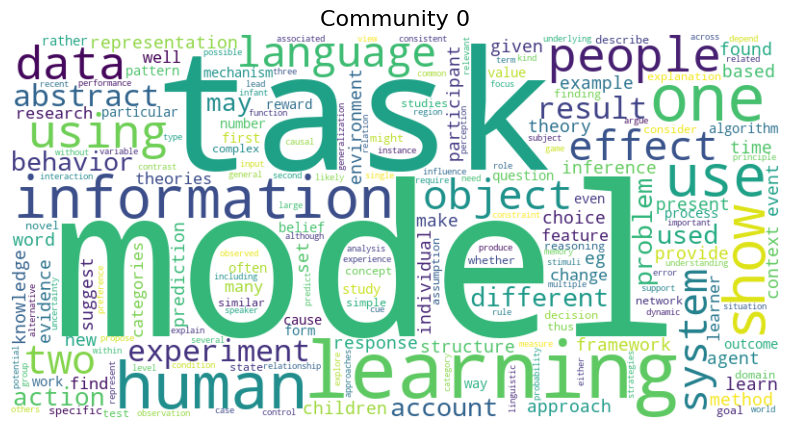

Markus Strohmaier
    Scott A. Hale
  Ralph Schroeder


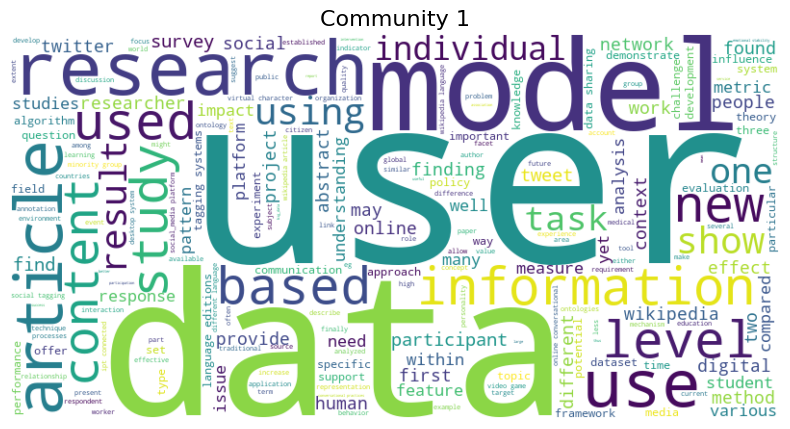

   Joseph Henrich
Richard McElreath
   Alberto Acerbi


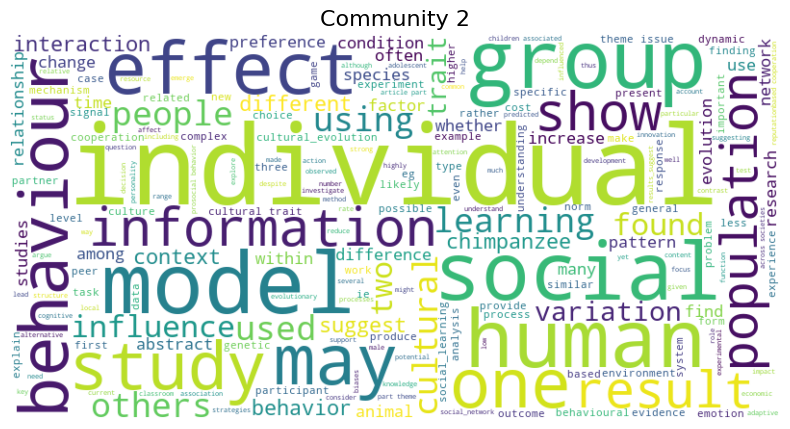

Alex Pentland
  Bruno Lepri
    Nicu Sebe


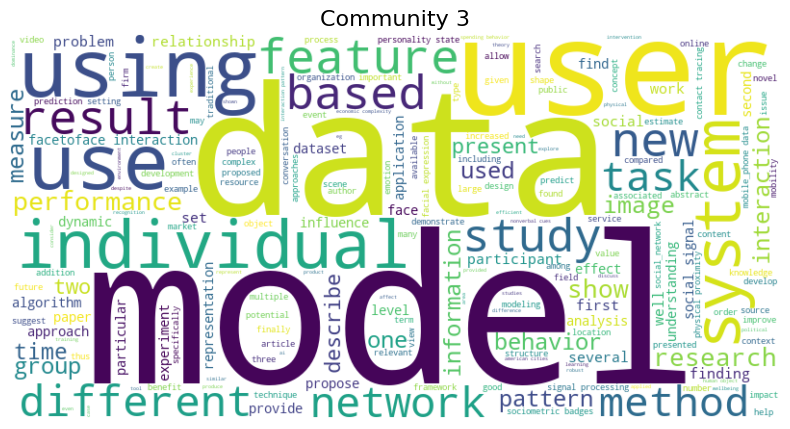

Stephan Lewandowsky
      Ralph Hertwig
Daniel G. Goldstein


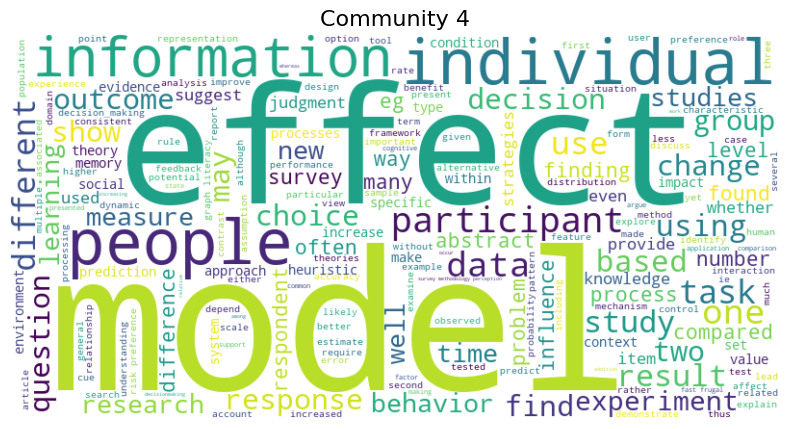

   David G. Rand
Gordon Pennycook
     Dean Eckles


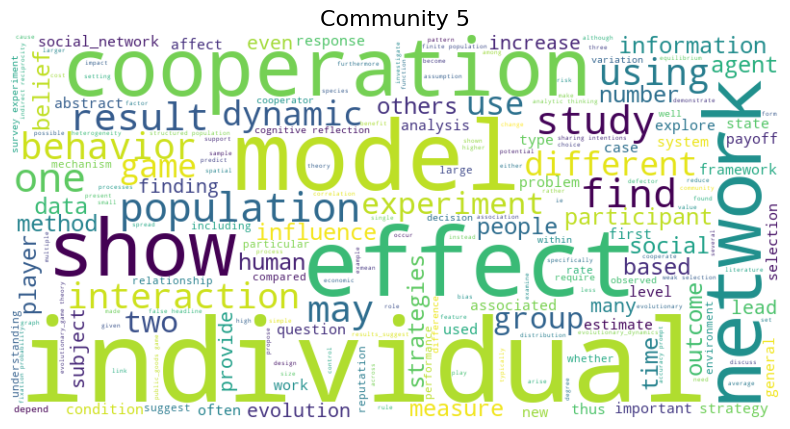

Joseph Jay Williams
     Dhavan V. Shah
   Rachel Kornfield


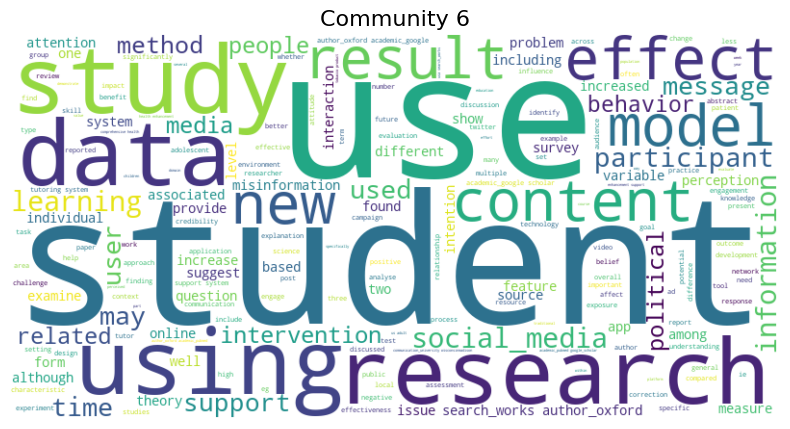

        Eric Horvitz
Michael S. Bernstein
  Jeffrey T. Hancock


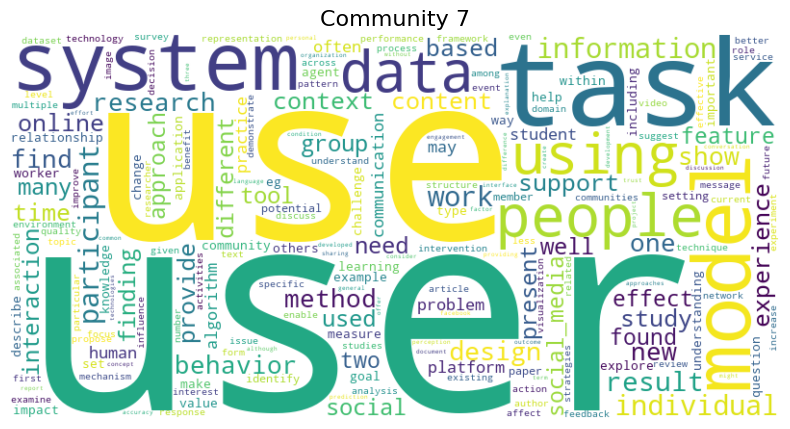

      Koji Suzuki
      John Bryden
Soroush Saghafian


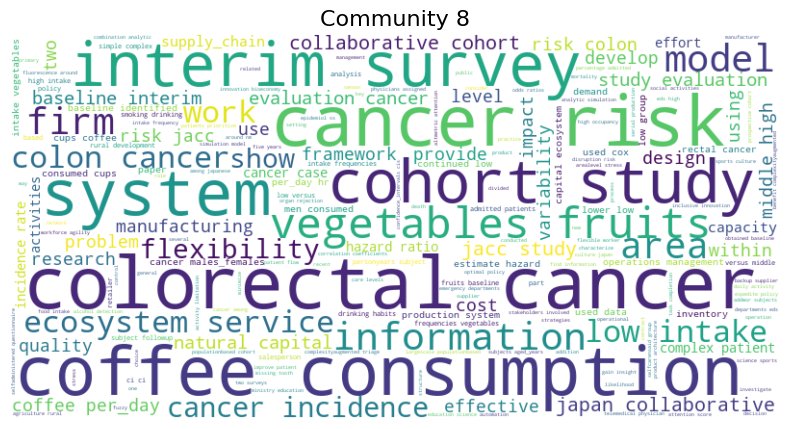

        Dan Jurafsky
Chris Callison-Burch
           Diyi Yang


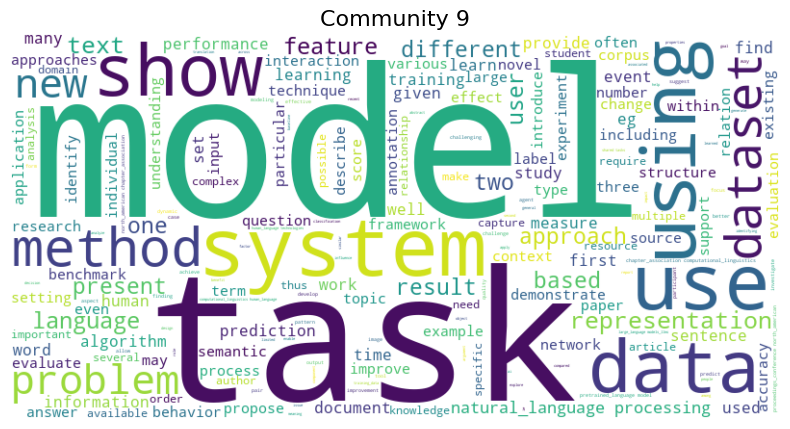

Emilio Zagheni
  Ingmar Weber
  Sune Lehmann


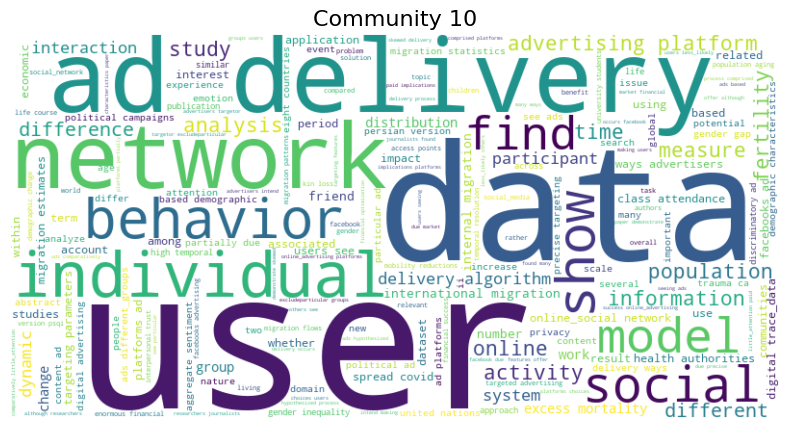

Luı́s A. Nunes Amaral
    H. Eugene Stanley
     Frank Schweitzer


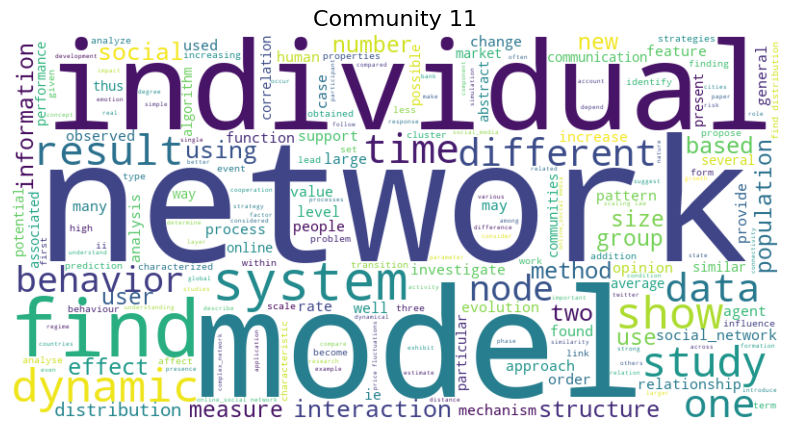

KeyboardInterrupt: 

In [134]:
for i, row in community_docs.iterrows():
    community_id = row['Community']
    tokens = row['community_tokens']

    # Join tokens into a single string
    text = ' '.join(tokens)

    # Create the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Get top 3 authors by Degree in this community
    top_authors = (
        authors_merge[authors_merge['Community'] == community_id]
        .sort_values(by='Degree', ascending=False)
        .drop_duplicates(subset='Author')
        .head(3)
    )

    print(top_authors["display_name"].to_string(index=False))

    # Display it
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Community {community_id}', fontsize=16)
    plt.show()



 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__